In [99]:
import warnings
warnings.filterwarnings("ignore")

# Q1. Perform basic EDA 

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df=pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [103]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(13200, 7)


In [105]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [107]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [109]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation 
b) Percentile method 
c) IQR(Inter quartile range method) 
d) Z Score method

In [111]:
df.duplicated().sum()

1049

In [113]:
df.drop_duplicates(inplace=True)

In [115]:
print(df.shape)

(12151, 7)


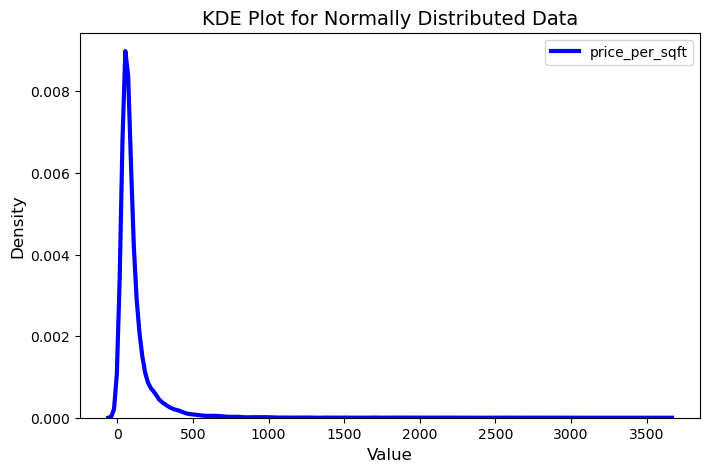

In [117]:
# To understand the dataset is symmetric or assymeric 
# Read dataset
df = pd.read_csv("house_price.csv")

# Plot KDE for both columns
plt.figure(figsize=(8, 5))
sns.kdeplot(df["price"], color='blue',  label="price_per_sqft",linewidth=3)


# Labels and Title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("KDE Plot for Normally Distributed Data", fontsize=14)
plt.legend()

# Show Plot
plt.show()

In [119]:
# To find the skewness of each columns in the dataset
df[["price_per_sqft","total_sqft","bath","price","bhk"]].skew()

price_per_sqft    108.281055
total_sqft         15.388820
bath                4.249636
price               8.100191
bhk                 4.867343
dtype: float64

Original Skewness:
 price_per_sqft    108.281055
total_sqft         15.388820
bath                4.249636
price               8.100191
bhk                 4.867343
dtype: float64
Square Root Skewness:
 price_per_sqft_sqrt    50.926028
total_sqft_sqrt         3.570608
bath_sqrt               1.534826
price_sqrt              2.897882
bhk_sqrt                1.461400
dtype: float64


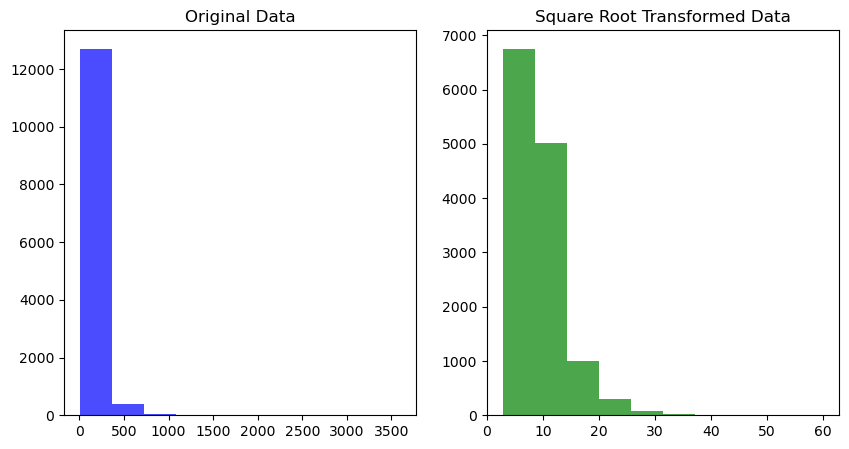

In [121]:
# To reduce the skewness of the dataset,using sqaure root transformation 
# Load data
df = pd.read_csv("house_price.csv")

# Check original skewness
print("Original Skewness:\n", df[["price_per_sqft", "total_sqft", "bath", "price", "bhk"]].skew())

# Apply square root transformation to selected columns
df[['price_per_sqft_sqrt', 'total_sqft_sqrt', 'bath_sqrt', 'price_sqrt', 'bhk_sqrt']] = np.sqrt(df[["price_per_sqft", "total_sqft", "bath", "price", "bhk"]])

# Check skewness after transformation
print("Square Root Skewness:\n", df[['price_per_sqft_sqrt', 'total_sqft_sqrt', 'bath_sqrt', 'price_sqrt', 'bhk_sqrt']].skew())


# Plot the distributions
plt.figure(figsize=(10, 5))

# Original data distribution (Example: price column)
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=10, color='blue', alpha=0.7)
plt.title("Original Data")

# Transformed data distribution (Example: price_sqrt column)
plt.subplot(1, 2, 2)
plt.hist(df['price_sqrt'], bins=10, color='green', alpha=0.7)
plt.title("Square Root Transformed Data")

plt.show()


In [123]:
# Apply second square root transformation
df[['price_per_sqft_sqrt2', 'total_sqft_sqrt2', 'bath_sqrt2', 'price_sqrt2', 'bhk_sqrt2']] = np.sqrt(df[['price_per_sqft_sqrt', 'total_sqft_sqrt', 'bath_sqrt', 'price_sqrt', 'bhk_sqrt']])

# Check skewness after second transformation
print("Second Square Root Skewness:\n", df[['price_per_sqft_sqrt2', 'total_sqft_sqrt2', 'bath_sqrt2', 'price_sqrt2', 'bhk_sqrt2']].skew())


Second Square Root Skewness:
 price_per_sqft_sqrt2    7.503654
total_sqft_sqrt2        1.699675
bath_sqrt2              0.920731
price_sqrt2             1.664800
bhk_sqrt2               0.754591
dtype: float64


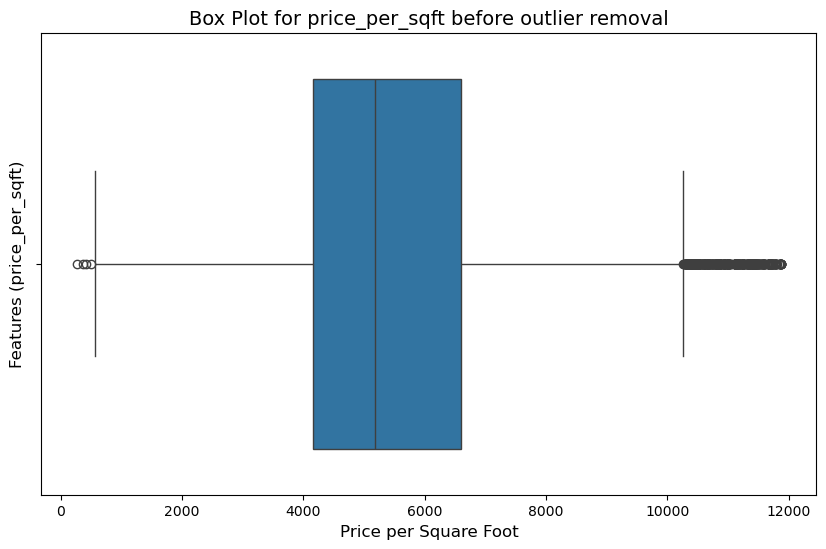

In [125]:
# Plotting the Box Plot for price_per_sqft
plt.figure(figsize=(10, 6))

# Box plot for 
sns.boxplot(x=newdf['price_per_sqft'],orient='h')

# Adding title and labels
plt.title('Box Plot for price_per_sqft before outlier removal', fontsize=14)
plt.xlabel('"Price per Square Foot ', fontsize=12)
plt.ylabel('Features (price_per_sqft)', fontsize=12)

# Display the plot

plt.xlabel("Price per Square Foot")
plt.show()

In [133]:
# The dataset is not symmetric ,so using IQR method for Detecting outliers
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr=q3-q1
upper_limit = q3 +(1.5*iqr)
lower_limit =  q1 - (1.5*iqr)
print(upper_limit, lower_limit)
print(q1,q3,iqr)

11892.0 -308.0
4267.0 7317.0 3050.0


In [135]:
# Find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_sqrt,total_sqft_sqrt,bath_sqrt,price_sqrt,bhk_sqrt,price_per_sqft_sqrt2,total_sqft_sqrt2,bath_sqrt2,price_sqrt2,bhk_sqrt2
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181,134.836939,57.445626,2.000000,24.494897,2.000000,11.611931,7.579289,1.414214,4.949232,1.414214
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,190.457344,31.937439,2.449490,19.235384,2.449490,13.800628,5.651322,1.565085,4.385816,1.565085
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571,116.494635,52.915026,2.236068,19.493589,2.000000,10.793268,7.274272,1.495349,4.415154,1.414214
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,182.573273,24.494897,3.000000,14.142136,2.828427,13.511968,4.949232,1.732051,3.760603,1.681793
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250,127.475488,28.284271,1.000000,11.401754,1.414214,11.290504,5.318296,1.000000,3.376648,1.189207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228,127.389168,33.763886,1.000000,13.601471,1.414214,11.286681,5.810670,1.000000,3.688017,1.189207
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571,124.783813,37.416574,2.645751,14.764823,2.645751,11.170668,6.116909,1.626577,3.842502,1.626577
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,209.761770,22.360680,1.000000,14.832397,1.000000,14.483155,4.728708,1.000000,3.851285,1.000000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,164.569134,34.641016,2.236068,18.027756,2.000000,12.828450,5.885662,1.495349,4.245911,1.414214


In [137]:
#trimming - deleting the outliers
newdf= df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print("before removing the data:", len(df))
print("after removing the data:", len(newdf))
print("outliers:", len(df)-len(newdf))

before removing the data: 13200
after removing the data: 11935
outliers: 1265


# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

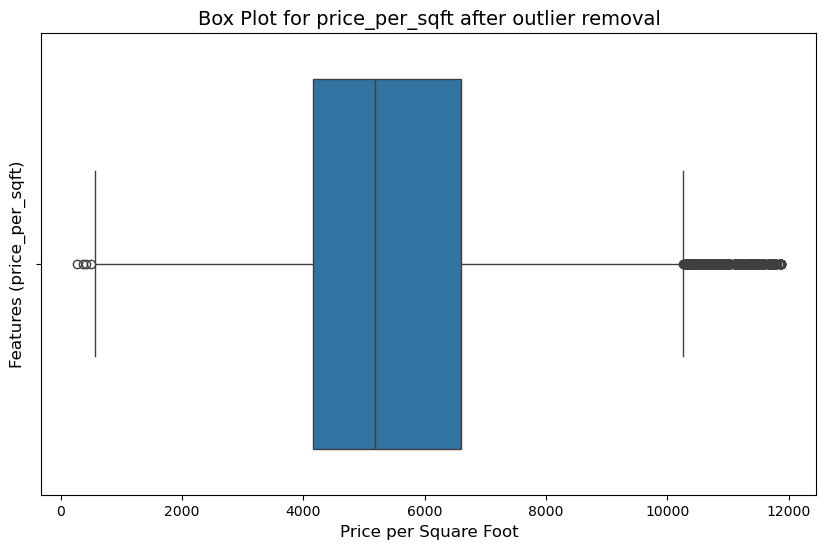

In [139]:

# Plotting the Box Plot for price_per_sqft'
plt.figure(figsize=(10, 6))

# Box plot for price_per_sqft 
sns.boxplot(x=newdf['price_per_sqft'],orient='h')  

# Adding title and labels
plt.title('Box Plot for price_per_sqft after outlier removal', fontsize=14)
plt.xlabel('Price per Square Foot', fontsize=12)
plt.ylabel('Features (price_per_sqft)', fontsize=12)

# Display the plot
plt.show()


# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

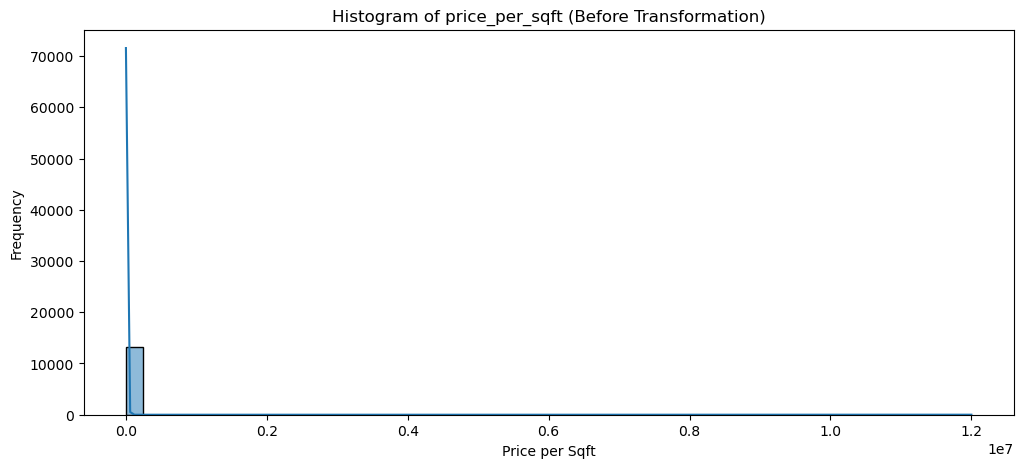

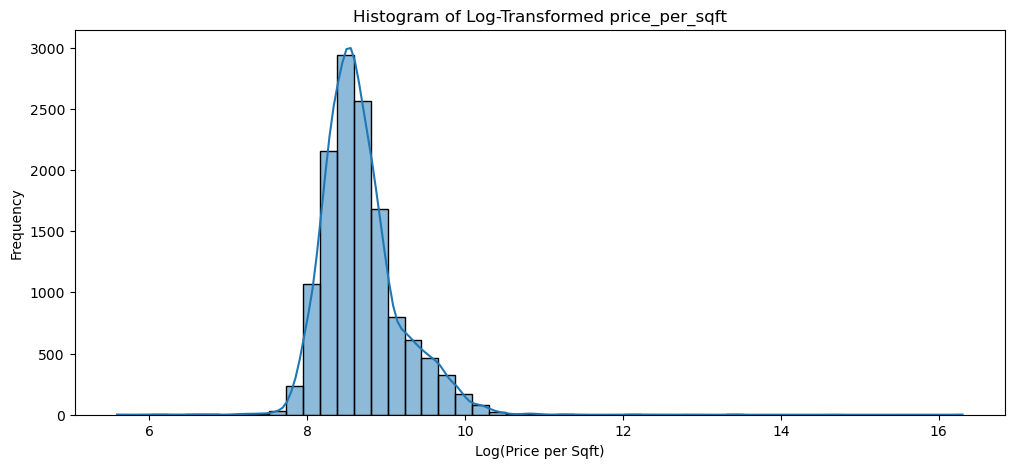

Skewness Before: 108.28105529705168, Kurtosis Before: 12095.21502832288
Skewness After: 1.4004850530059296, Kurtosis After: 9.206942162860814


In [141]:
# Load dataset
df = pd.read_csv("House_price.csv")

# Check skewness and kurtosis before transformation
skew_before = df["price_per_sqft"].skew()
kurt_before = df["price_per_sqft"].kurtosis()

# Plot histogram before transformation
plt.figure(figsize=(12, 5))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Histogram of price_per_sqft (Before Transformation)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Apply log transformation
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

# Check skewness and kurtosis after transformation
skew_after = df["price_per_sqft_log"].skew()
kurt_after = df["price_per_sqft_log"].kurtosis()

# Plot histogram after transformation
plt.figure(figsize=(12, 5))
sns.histplot(df["price_per_sqft_log"], bins=50, kde=True)
plt.title("Histogram of Log-Transformed price_per_sqft")
plt.xlabel("Log(Price per Sqft)")
plt.ylabel("Frequency")
plt.show()

# Display skewness and kurtosis before and after transformation
print(f"Skewness Before: {skew_before}, Kurtosis Before: {kurt_before}")
print(f"Skewness After: {skew_after}, Kurtosis After: {kurt_after}")


# Q5. Check the correlation between all the numerical columns and plot heatmap.

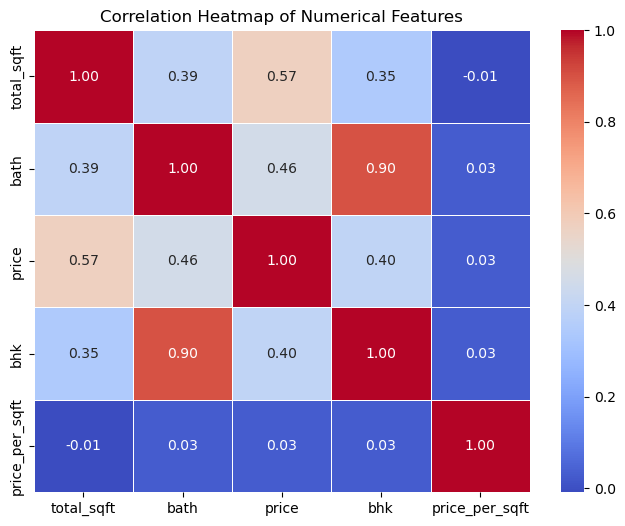

In [143]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("house_price.csv")

# Compute correlation matrix for numerical columns
correlation_matrix = df.corr(numeric_only=True)  # Ensure only numerical columns are considered

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# Q6. Draw Scatter plot between the variables to check the correlation between them. 

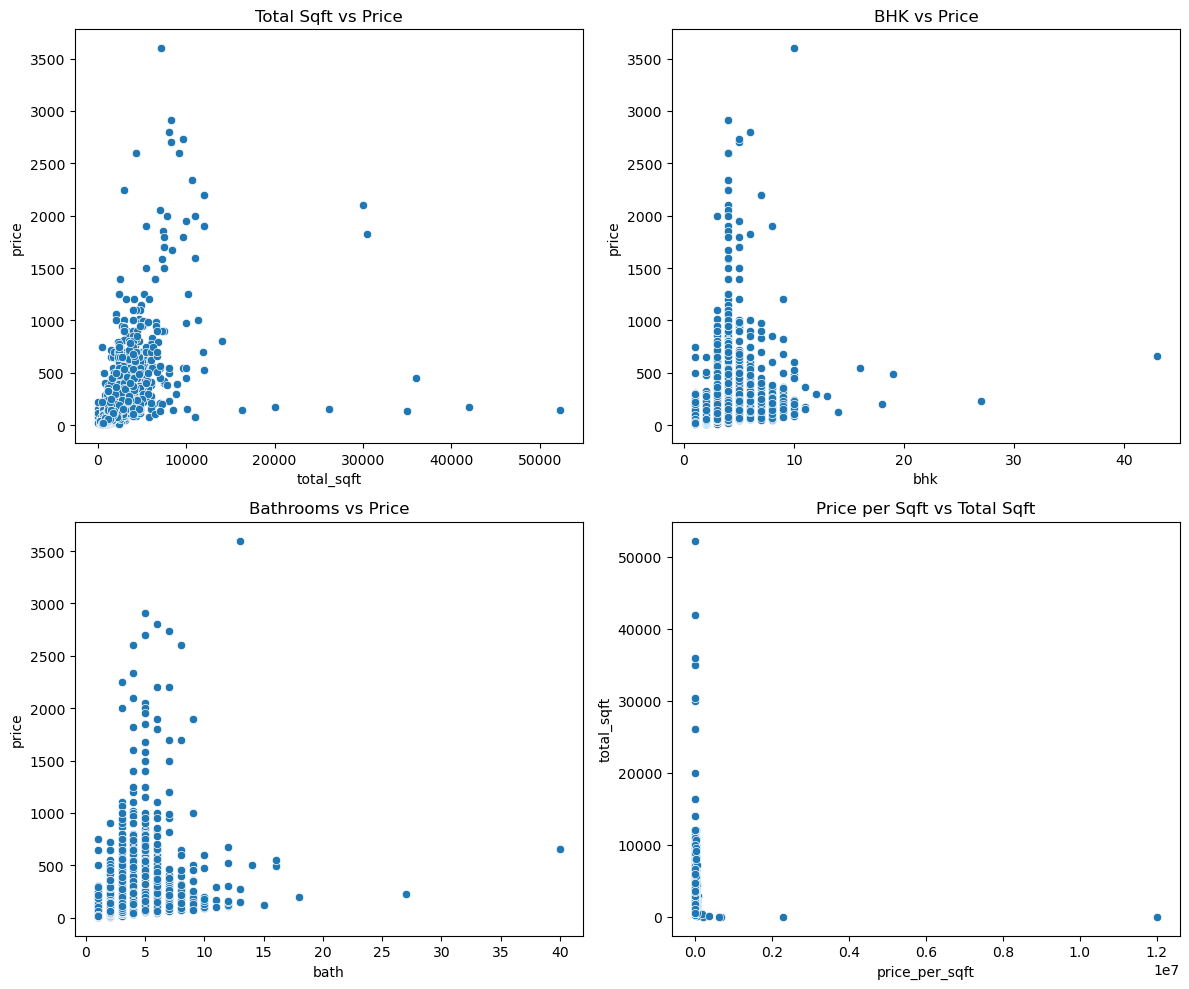

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df['total_sqft'], y=df['price'], ax=axes[0, 0])
axes[0, 0].set_title("Total Sqft vs Price")

sns.scatterplot(x=df['bhk'], y=df['price'], ax=axes[0, 1])
axes[0, 1].set_title("BHK vs Price")

sns.scatterplot(x=df['bath'], y=df['price'], ax=axes[1, 0])
axes[1, 0].set_title("Bathrooms vs Price")

sns.scatterplot(x=df['price_per_sqft'], y=df['total_sqft'], ax=axes[1, 1])
axes[1, 1].set_title("Price per Sqft vs Total Sqft")

plt.tight_layout()
plt.show()


--The End--